# Import Library

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

# Read File 

In [2]:
df = pd.read_csv("d://Machine Learning/Regression Analysis-20231127T061222Z-001/Regression Analysis/fish/Fish_dataset.csv")

# Desc & Handling 

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.shape

(159, 7)

In [7]:
df.size

1113

# Missing values

In [8]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Outlier 

In [10]:
# Q2. Identify outliers and remove if any?

In [11]:
import seaborn as sns

<Axes: >

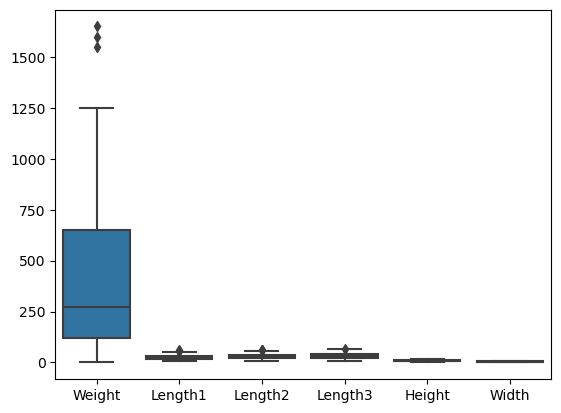

In [12]:
sns.boxplot(df)

In [13]:
for x in df.columns[::]:
    if df[x].dtype==object:
        continue
    else:
        q1=df[x].quantile(q=0.25)
        q3=df[x].quantile(q=0.75)
        IQR= q3-q1
        
        low=q1-1.5*IQR
        high=q3+1.5*IQR
        df.loc[(df[x]<low)| (df[x]>high),x]=df[x].median()

<Axes: >

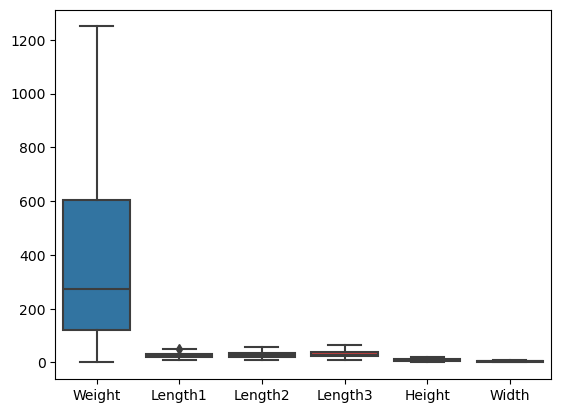

In [14]:
sns.boxplot(df)

# Bar plot

<Axes: >

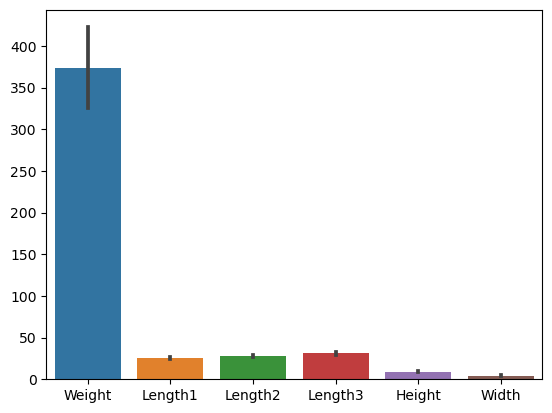

In [15]:
sns.barplot(df)

In [16]:
# Q1. Plot a bar chart showing the count of individual species?

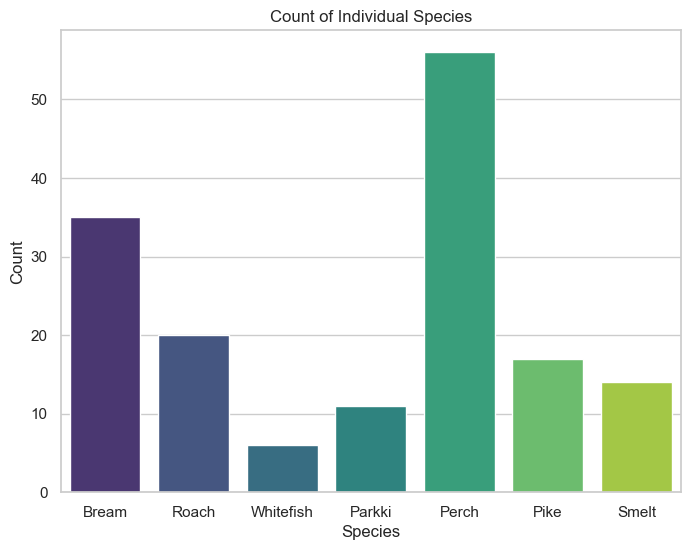

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'species' is the column in your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=df, palette='viridis')
plt.title('Count of Individual Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


In [18]:
# Q5. Compare real and predicted weights and give a conclusion statement based on it?

# Standardization

In [19]:
x= df['Species']

In [20]:
df1=pd.get_dummies(x)

In [21]:
df=pd.concat([df,df1],axis=1)

In [22]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


In [23]:
df.drop(['Species'],inplace=True,axis=1)

In [24]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
Weight,1.000000,0.895156,0.899167,0.843011,0.799031,0.898463,0.411386,-0.188597,0.020898,0.121877,-0.265733,-0.356285,0.098894
Length1,0.895156,1.000000,0.999418,0.932271,0.675585,0.872316,0.274864,-0.209513,0.007251,0.431045,-0.210723,-0.496577,0.069339
Length2,0.899167,0.999418,1.000000,0.934579,0.691202,0.878628,0.292935,-0.209550,0.008808,0.419917,-0.215863,-0.509558,0.072489
Length3,0.843011,0.932271,0.934579,1.000000,0.717631,0.868443,0.349647,-0.199465,-0.093027,0.477756,-0.203718,-0.498022,0.058928
Height,0.799031,0.675585,0.691202,0.717631,1.000000,0.792881,0.772443,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951
Width,0.898463,0.872316,0.878628,0.868443,0.792881,1.000000,0.319347,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388
Bream,0.411386,0.274864,0.292935,0.349647,0.772443,0.319347,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209
Parkki,-0.188597,-0.209513,-0.209550,-0.199465,-0.000547,-0.194147,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Perch,0.020898,0.007251,0.008808,-0.093027,-0.191405,0.144021,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Pike,0.121877,0.431045,0.419917,0.477756,-0.101810,0.137722,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519


In [38]:
x=df[['Length1','Length2','Length3','Height','Width']]
y=df['Weight']

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=40)

In [42]:
model = LinearRegression()

In [43]:
model.fit(x_train,y_train)

LinearRegression()

In [44]:
yp=model.predict(x_train)
ypd=model.predict(x_test)

In [45]:
from sklearn.metrics import r2_score

In [46]:
x = r2_score(y_train,yp)
X= r2_score(y_test,ypd)
print("R^2_test =",x)
print("R^2_train =",X)

R^2_test = 0.8939986038097781
R^2_train = 0.8870944096535753


# Lasso

In [47]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train,y_train)

Lasso()

In [48]:
yp=lasso_reg.predict(x_train)
ypd=lasso_reg.predict(x_test)

In [49]:
from sklearn.metrics import r2_score
x = r2_score(y_train,yp)
X= r2_score(y_test,ypd)
print("R^2_train =",x)
print("R^2_test =",X)

R^2_train = 0.8924105385656046
R^2_test = 0.8862259407226077


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Weight     159 non-null    float64
 1   Length1    159 non-null    float64
 2   Length2    159 non-null    float64
 3   Length3    159 non-null    float64
 4   Height     159 non-null    float64
 5   Width      159 non-null    float64
 6   Bream      159 non-null    bool   
 7   Parkki     159 non-null    bool   
 8   Perch      159 non-null    bool   
 9   Pike       159 non-null    bool   
 10  Roach      159 non-null    bool   
 11  Smelt      159 non-null    bool   
 12  Whitefish  159 non-null    bool   
dtypes: bool(7), float64(6)
memory usage: 8.7 KB


# Ridge

In [54]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge()
ridge_reg.fit(x_train,y_train)

Ridge()

In [55]:
ridge_reg.score(x_test,y_test)

0.887292341373989

In [56]:
ridge_reg.score(x_train,y_train)

0.8938112977539617

# Elastic Net

In [58]:
from sklearn.linear_model import ElasticNet
En_reg = ElasticNet()
En_reg.fit(x_train,y_train)

ElasticNet()

In [59]:
En_reg.score(x_test,y_test)

0.8901254705308173

In [60]:
En_reg.score(x_train,y_train)

0.8851271213443557

# Simple Regression

In [67]:
x = df["Width"].values.reshape(-1,1)
y = df['Weight']

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=40)

In [71]:
model = LinearRegression()

In [72]:
model.fit(x_train,y_train)

LinearRegression()

In [74]:
yp=model.predict(x_train)
ypd=model.predict(x_test)


In [75]:
from sklearn.metrics import r2_score
x = r2_score(y_train,yp)
X= r2_score(y_test,ypd)
print("R^2_test =",x)
print("R^2_train =",X)

R^2_test = 0.8170543574935215
R^2_train = 0.7735488170097967


# To increase the learning accuracy , the below methods should follow
1. cross Validation
2. Grid Search